In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('StudyHours.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [3]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


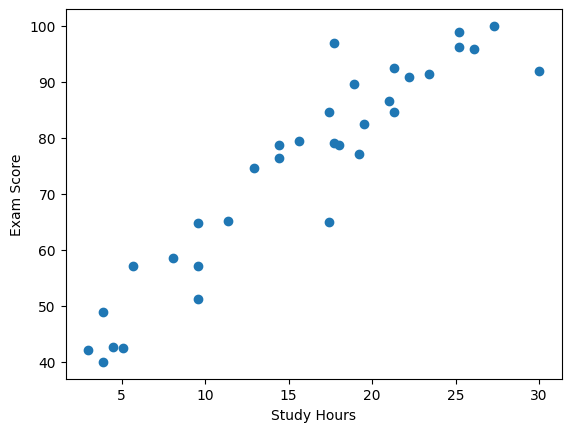

In [4]:
plt.scatter(df['Study Hours'], df['Exam Score'])
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

In [5]:
X = df["Study Hours"]
y = df["Exam Score"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [8]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [9]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [10]:
# dataları %80e %20 olarak böldük

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train

18    17.4
1      9.6
2      4.5
32    18.9
6     19.2
3     11.4
29    19.5
26     9.6
9     17.4
4     14.4
28    17.7
10    21.3
27    15.6
13    27.3
17    12.9
15    17.7
22    14.4
31    25.2
11    26.1
7     22.2
0      3.9
23     3.0
5     18.0
12    30.0
21     8.1
8     25.2
Name: Study Hours, dtype: float64

In [17]:
X_train=scaler.fit_transform(np.array(X_train).reshape(-1,1))
X_test=scaler.transform(np.array(X_test).reshape(-1,1))

In [18]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [19]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression = LinearRegression()

In [22]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
print("Coefficient:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient: [16.17860223]
Intercept: 76.9076923076923


In [24]:
# y = mx + b
# y = Exam Score
# m = Coefficient
# x = Study Hours
# b = Intercept
# Exam Score = (Coefficient * Study Hours) + Intercept

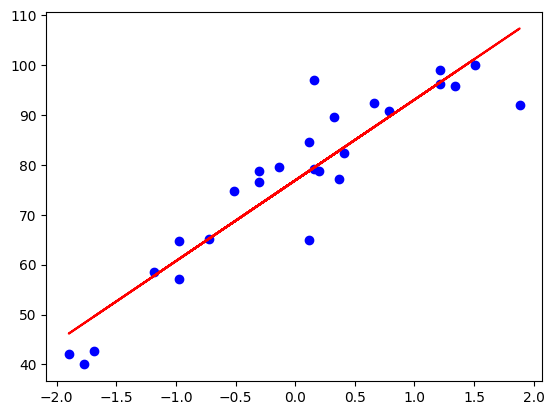

In [25]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regression.predict(X_train), color='red')
plt.show()

In [31]:
regression.predict([[0.48]])

array([84.67342138])

In [32]:
y_pred_test = regression.predict(X_test)

In [33]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [34]:
y_pred_test

array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
       48.23291515, 87.65093152])

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 29.45839048833392
Mean Absolute Error: 4.054868128856142
Root Mean Squared Error: 5.427558427906043


In [41]:
r2 = r2_score(y_test, y_pred_test)
r2

0.9196596206825491